**Capstone Topic:** Predicting Hospital Readmission Rates in Diabetic Patients

### Introduction

Hospital readmissions are one of the costliest challenges facing the healthcare system, in the Unites States. The definition of a readmission is when a patient has been readmitted to the same or another acute care facility within 30 days of an intial hospital stay. In 2018, there were 3.8 million adult readmissions in the United States. The average cost per readmission is about $15,200. The thirty-day readmission rates for hospitalized patients with diabetes is approximately between 14.4-22.7%, which is significantly higher than the readmission rates for patients without diabetes (8.5-13.5%). Approximately, 20% of all adult hospital readmissions were associated with the following four conidtions: diabetes, heart failure, septicemia, and COPD. 

Predicting hospital readmission rates in diabetic patients is valuable beause it reduces healthcare costs, reduces tax payer spending, and improves quality patient care. The objective of this project is to identify key features associated with higher readmission rates and to sucessful build a model to predict hospital readmissions in diabetic patients using machine learning techniques. As a result, this could potentially save hospitals and tax payers millions of dollars while improving the quality of patient care. 

### Table of Contents

* [Introduction](#Introduction)
* [Table of Contents](#Table-of-Contents)
* [Dataset & Exploratory Data Analysis](#Loading-Data)
    * [Data Dictionary](#Table-of-Contents)
    * [Dataset Preparation](#Dataset-Preparation)
* [Employ a Logistic Classifier](#Logistic-Regression)
* [Results](#Results)
* [Conclusion](#Conclusion)
    * [Further Research](#Further-Research)


### Dataset and Exploratory Data Analysis

I will be using a dataset provided by Kaggle. This dataset was originally provided by the University of California Irvine Machine Learning Repository. The dataset represents 10 years of clinical care at 130 United States hospitals and integrated delivery networks. As shown below, the dataset contains over 100,000 rows and 50 columns. Each row represents a time someone was hospitalized and a majority of the columns represents patient specific parameters (i.e. age, weight,gender, medical history, lab results, number of days the patient spent in the hospital the year prior, medication history, etc) and one physician-specific parameter (specialization and expertise). 

For the exploratory data analysis, I will begin by exploring the dictionary shown below, to better understand the data. In this project I will be using python and various machine learning packages to help me throughout the process. In this section, I will start by cleaning the data and preparing the data for model building. 

#### Data Dictinary
- **patient_num:** Unique identifier of a patient
- **encounter_id:**:Unique identifier of an encounter
- **race:** Values: Caucasian, Asian, African American, Hispanic, and other
- **gender:** Values: male, female, and unknown/invalid
- **weight:** weight in pounds
- **age:** Grouped in 10-year intervals: [0, 10), [10, 20),..., [90, 100)

- **number_inpatient:** The number of inpatient visits the patient had in the year prior to the encounter
- **number_emergency:** The number of emergency visits the patient had in the year prior to the encounter
- **discharge_disposition_id:** The distinct numerical value associated with the 29 different categories representing were the patient was discharged after their hospital stay (i.e. home, hospice, etc.).
- **number_diagnoses:** Refers to the number of medical diagnoses entered in the system
- **time_in_hospital:** number of days between admission and discharge
- **Admission_type_id:** Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available. 
- **Admission_source_id:** Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
- **time_in_hospital:** Integer number of days between admission and discharge.
- **payer_code:** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay
- **medical_specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon	
- **num_lab_procedures:** Number of lab tests performed during the encounter
- **num_procedures:** Number of procedures (other than lab tests) performed during the encounter
- **num_medications** Number of distinct generic names administered during the encounter
- **number_outpatient**
- **diag_1:** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- **diag_2:** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values	
- **diag_3:** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- **max_glu_serum:** Indicates the range of the result or if the test was not taken. Values: >200, >300, normal, and none if not measured
- **A1Cresult:** Indicates the range of the result or if the test was not taken. Values: >8 if the result was greater than 8%, >7 if the result was greater than 7% but less than 8%, normal if the result was less than 7%, and none if not measured.
- **metformin:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **repaglinide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **nateglinide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **chlorpropamide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **glimepiride:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **acetohexamide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **glipizide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **glyburide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **tolbutamide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **pioglitazone:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **rosiglitazone:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **acarbose:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **miglitol:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **troglitazone:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **tolazamide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **examide:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **citoglipton:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **Insulin:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **glyburide.metformin:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **glipizide.metformin:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **glimepiride.pioglitazone:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **metformin.rosiglitazone:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed	
- **metformin.pioglitazone:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed
- **change:** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: change and no change
- **diabetesMed:** Indicates if there was any diabetic medication prescribed. Values: yes and no
- **readmitted:** Days to inpatient readmission. Values: <30 if the patient was readmitted in less than 30 days, >30 if the patient was readmitted in more than 30 days, and No for no record of readmission.	

In [2]:
# Let's start by importing relevant packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Import the dataset and view the first row and columns to better understand the data

df = pd.read_csv('~/Desktop/da_data.csv')
df.head(1)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
# Let's gain more insight by viewing the index dtype, total columns, and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
# Let's view the shape of our dataframe

df.shape

(101766, 50)

After taking a closer look at our dataset, we see our dataframe has 101,766 rows and 50 columns. A majority of the columns have a string/object Dtype and there are no null values present. However, this can be deceiving because all missing values contain a "?" instead of null value. The code below, shows us there are 7 columns that contain "?". We will examine the following columns identify how many "?" are present within the following columns: race, weight, payer_code, medical_specialty, diag_1, diag_2, and diag_3. 

In [7]:
# Let's identify which columns contain "?" values

def identify_question_mark_columns(df):
    question_mark_columns = []
    for column in df.columns:
        if df[column].astype(str).str.contains("\?").any():
            question_mark_columns.append(column)
    return question_mark_columns

columns_with_question_mark = identify_question_mark_columns(df)

print("Columns with '?' character:", columns_with_question_mark)

Columns with '?' character: ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


In [6]:
# Let's print the number of "?" within the 7 columns and print a percentage associated with it

def calculate_question_mark_stats(df, columns, total_rows):
    question_mark_stats = {}
    for column in columns:
        count = df[column].astype(str).str.count("\?").sum()
        percentage = (count / total_rows) * 100
        question_mark_stats[column] = {'count': count, 'percentage': percentage}
    return question_mark_stats


total_rows = 101766
columns_to_count = ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

# Calculate the count and percentage of "?" in the specified columns
question_mark_stats = calculate_question_mark_stats(df, columns_to_count, total_rows)

# Print the counts and percentages
for column, stats in question_mark_stats.items():
    count = stats['count']
    percentage = stats['percentage']
    print("Column '{}': {} question marks ({}%)".format(column, count, percentage))

Column 'race': 2273 question marks (2.2335554114340743%)
Column 'weight': 98569 question marks (96.85847925633315%)
Column 'payer_code': 40256 question marks (39.5574160328597%)
Column 'medical_specialty': 49949 question marks (49.08220820313268%)
Column 'diag_1': 21 question marks (0.02063557573256294%)
Column 'diag_2': 358 question marks (0.3517874339170253%)
Column 'diag_3': 1423 question marks (1.398305917497003%)


Here, I decided to drop 7 columns: weight, payer_code, medical_specialty, diag_1, diag_2, diag_3. I dropped the weight column 
because over 96% of the column contained question marks. The payer_code was dropped because I did not think the patients choice of payment was relevant to my objective. I decided to drop the medical_specialty code because it contains 49% question marks.The diag_1-3 column was dropped because it contains between 848-923 distinct alphabetical and numerical values which I was unable to group together. For the race column, I decided to drop all rows that contain question marks because I felt 2.2% of our data is a small percentage to be missing. I'll also be dropping the encounter_id column because it is redundant and our dataset also contains a patient_num column which is a unique identifier. 

In [8]:
# Below, we will drop the 7 columns mentioned abover:

columns_to_drop = ['weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3','encounter_id']

# Drop the specified columns from the DataFrame

df = df.drop(columns=columns_to_drop)

In [9]:
# Let's look at the values within the race column

df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [10]:
# Let's remove all of the rows that contain "?" under the "race" column

df = df.drop(df[df['race'] == '?'].index)

In [11]:
# Let's confirm

df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

We have five different race categories: caucasian, AfericanAmerican, Hispanic, Other, and Asian. l will one hot encode the "race" column. Typically, I would drop the "Asian" category because it represents the smallest group of patients and can be determined from the other columns. However, for the sake of this project, I would like to include all race categories in case it provides more insight.

In [12]:
# Let's use getdummies to one hot encode

pd.get_dummies(df['race'])

,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
101761,1,0,0,0,0
101762,1,0,0,0,0
101763,0,0,1,0,0
101764,0,0,1,0,0


In [13]:
# Let's save this as a new dataframe

dummies_df = pd.get_dummies(df['race'])

In [14]:
# Let's merge dummies with our original(df) dataframe by concatenation

df1 = pd.concat([df,dummies_df], axis= 1)

df1 

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,NO,0,0,1,0,0
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,No,Ch,Yes,>30,0,0,1,0,0
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,Yes,NO,1,0,0,0,0
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,No,Ch,Yes,NO,0,0,1,0,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,No,Ch,Yes,NO,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,No,Ch,Yes,>30,1,0,0,0,0
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,No,No,Yes,NO,1,0,0,0,0
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,No,Ch,Yes,NO,0,0,1,0,0
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,No,Ch,Yes,NO,0,0,1,0,0


In [15]:
# Now, we can drop our original "race" column

df1.drop(['race'], axis=1, inplace = True)

In [16]:
# confirmation

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               99493 non-null  int64 
 1   gender                    99493 non-null  object
 2   age                       99493 non-null  object
 3   admission_type_id         99493 non-null  int64 
 4   discharge_disposition_id  99493 non-null  int64 
 5   admission_source_id       99493 non-null  int64 
 6   time_in_hospital          99493 non-null  int64 
 7   num_lab_procedures        99493 non-null  int64 
 8   num_procedures            99493 non-null  int64 
 9   num_medications           99493 non-null  int64 
 10  number_outpatient         99493 non-null  int64 
 11  number_emergency          99493 non-null  int64 
 12  number_inpatient          99493 non-null  int64 
 13  number_diagnoses          99493 non-null  int64 
 14  max_glu_serum        

Now, we will go through each column to ensure all of the object/string datatypes are turned into numeric datatypes. We will start by using the value_counts function on each column and take a closer look at the specific diabetes medication columns. Based on the value counts provided above, lets start by dropping all of the diabetes medications which were never used. This includes: citoglipton, examide, tolazamide, troglitazone, miglitol, acarbose, tolbutamide, acetohexamide, chlorpropamide, nateglinide, repaglinide, glyburide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone. 

In [17]:
# Let's create code to get the value counts of each column

object_columns = df1.select_dtypes(include=['object']).columns

# iterate over object columns and print value counts

for column in object_columns:
    print("Value counts for column '{}':".format(column))
    print(df1[column].value_counts())
    print()  

Value counts for column 'gender':
Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64

Value counts for column 'age':
[70-80)     25469
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: age, dtype: int64

Value counts for column 'max_glu_serum':
None    94203
Norm     2571
>200     1466
>300     1253
Name: max_glu_serum, dtype: int64

Value counts for column 'A1Cresult':
None    82897
>8       7961
Norm     4905
>7       3730
Name: A1Cresult, dtype: int64

Value counts for column 'metformin':
No        79972
Steady    17920
Up         1039
Down        562
Name: metformin, dtype: int64

Value counts for column 'repaglinide':
No        97964
Steady     1375
Up          109
Down         45
Name: repaglinide, dtype: int64

Value counts for column 'nateglinide':
No        98797
Steady      662
Up           23
Down         11


In [18]:
# Let's drop the indicated medication columns

medication_columns = ['citoglipton', 'examide', 'tolazamide', 'troglitazone', 'miglitol', 'acarbose', 'tolbutamide',
                      'acetohexamide', 'chlorpropamide', 'nateglinide', 'repaglinide', 'glyburide-metformin',
                      'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'glipizide-metformin']

# Drop the medication columns from the DataFrame

df1.drop(columns=medication_columns, inplace=True)

In [20]:
# Let's confirm

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               99493 non-null  int64 
 1   gender                    99493 non-null  object
 2   age                       99493 non-null  object
 3   admission_type_id         99493 non-null  int64 
 4   discharge_disposition_id  99493 non-null  int64 
 5   admission_source_id       99493 non-null  int64 
 6   time_in_hospital          99493 non-null  int64 
 7   num_lab_procedures        99493 non-null  int64 
 8   num_procedures            99493 non-null  int64 
 9   num_medications           99493 non-null  int64 
 10  number_outpatient         99493 non-null  int64 
 11  number_emergency          99493 non-null  int64 
 12  number_inpatient          99493 non-null  int64 
 13  number_diagnoses          99493 non-null  int64 
 14  max_glu_serum        

The gender category shows an extra category "Unknown/Invalid" with 3 patients(rows) represented 
within the category. I decided to delete that category and turn the gender column into an explicit 
number, so 'male'= 0 and 'female' = 1.

In [21]:
# Let's convert "gender" column into a binary column

df1['gender'] = np.where(df1['gender'] == 'Female', 1, 0)

In [22]:
# Confirmation

df1['gender'].value_counts()

1    53575
0    45918
Name: gender, dtype: int64

The age column is currently listed as an object datatype. In order to see the effect age has on readmission, I took the average/midpoint of every age interval. 

In [23]:
# code to find the midpoint
# code age intervals [0-10) - [90-100) from 1-10

for i in range(0,10):
     df1['age'] = df1['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', 5+(10*i))
     # print('['+str(10*i)+'-'+str(10*(i+1))+')', 5+(10*i))

In [24]:
# Confirmation

df1['age'].value_counts()

75    25469
65    21988
55    16895
85    16800
45     9465
35     3699
95     2724
25     1611
15      682
5       160
Name: age, dtype: int64

When looking at the value counts for 'max_glu_serum', we can find 4 distinct columns:
None, Norm, >200, >300. We will change the cateogries so that >200 and >300 are combined
into one "abnormal" category and ensure each category is represented by a number. The 
cateogries are: None (0), Normal(1), and Abnormal(2). We can also complete similar steps
for the A1Cresult. The A1C result columns contains 4 columns and we can condense it down 
to 3, by creating an abnormal category that includes >7 and >8.

In [25]:
# Let's change the max_glu_serum column

df1['max_glu_serum'] = df1['max_glu_serum'].replace('>200', 2)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('>300', 2)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('Norm', 1)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('None', 0)

In [26]:
# Let's change the A1Cresult column

df1['A1Cresult'] = df1['A1Cresult'].replace('>7', 2)
df1['A1Cresult'] = df1['A1Cresult'].replace('>8', 2)
df1['A1Cresult'] = df1['A1Cresult'].replace('Norm', 1)
df1['A1Cresult'] = df1['A1Cresult'].replace('None', 0)

In [27]:
# Now, lets view all of our columns

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               99493 non-null  int64 
 1   gender                    99493 non-null  int32 
 2   age                       99493 non-null  int64 
 3   admission_type_id         99493 non-null  int64 
 4   discharge_disposition_id  99493 non-null  int64 
 5   admission_source_id       99493 non-null  int64 
 6   time_in_hospital          99493 non-null  int64 
 7   num_lab_procedures        99493 non-null  int64 
 8   num_procedures            99493 non-null  int64 
 9   num_medications           99493 non-null  int64 
 10  number_outpatient         99493 non-null  int64 
 11  number_emergency          99493 non-null  int64 
 12  number_inpatient          99493 non-null  int64 
 13  number_diagnoses          99493 non-null  int64 
 14  max_glu_serum        

The following diabetes medications(cloumn names) are considered an object datatypes: metformin, glimepiride, glipizide, 
glyburide, pioglitazone, rosiglitazone, and insulin. To convert these columns into a numeric datatype, we will use dictionary
mapping for each category in the columns to their corresponding integer values. Then, we will apply the maping to each column 
using a loop. By going through these steps for each column, we convert the original categorical values ('No', 'Steady', 'Up',
'Down') to their corresponding integer representations using ordinal encoding. In return, this process allows us to transform categorical data into 
a numerical format that can be processed and analyzed by various machine learning techniques. 

In [28]:
# Let's impliement the diabetes medication column changes
# Define the dictionary mapping for each category in the columns

category_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': -1
}

# List of the columns to be converted

columns_to_convert = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']

# Apply the mapping to each column using a loop

for column in columns_to_convert:
    df1[column] = df1[column].map(category_mapping).astype(int)

In [29]:
# check

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               99493 non-null  int64 
 1   gender                    99493 non-null  int32 
 2   age                       99493 non-null  int64 
 3   admission_type_id         99493 non-null  int64 
 4   discharge_disposition_id  99493 non-null  int64 
 5   admission_source_id       99493 non-null  int64 
 6   time_in_hospital          99493 non-null  int64 
 7   num_lab_procedures        99493 non-null  int64 
 8   num_procedures            99493 non-null  int64 
 9   num_medications           99493 non-null  int64 
 10  number_outpatient         99493 non-null  int64 
 11  number_emergency          99493 non-null  int64 
 12  number_inpatient          99493 non-null  int64 
 13  number_diagnoses          99493 non-null  int64 
 14  max_glu_serum        

In regards to the "change" and "diabetesMed" column, I decided to binarize the column. Previously, the "change" column consisted of two categories "Ch" and "No", representing a change in diabetes medication or no change in the medicine. The column "diabetesMed" indicates whether the patient is taking a diabetes medication or not. Below, we can see the change column is now chaged to an explicit number, "0" indicating "No" and "1" indicating "Ch". The diabetesMed column is now chaged to an explicit number, "0" indicating "No" and "1" indicating "Yes." 

When viewing the value counts for the 'readmitted' category, we see the column contains three distinct categories: < 30, > 30, and NO (readmission). However, the outcome I am looking for is limited to hospital readmissions within 30 days or not. To binarize the readmitted column, I combined the readmission after 30 days and no readmission into a single category (as shown below):

 - less than 30 = 1
 - greater than 30 = 0
 - NO (not readmitted) = 0

In [30]:
# change column
# Was there a change in medication prescribed? Lets turn this column into an explicit number 'yes' : 1 and 'no': 0

df1['change'] = df1['change'].replace('Ch', 1)
df1['change'] = df1['change'].replace('No', 0)

In [31]:
# check

df1['change'].value_counts()

0    53582
1    45911
Name: change, dtype: int64

In [32]:
# diabetesMed column
# we will binarize this column by changing Yes=1 and No=0

df1['diabetesMed'] = df1['diabetesMed'].replace('No', 0)
df1['diabetesMed'] = df1['diabetesMed'].replace('Yes', 1)

In [33]:
# check
df1['diabetesMed'].value_counts()

1    76492
0    23001
Name: diabetesMed, dtype: int64

In [34]:
# readmitted column

df1['readmitted'] = df1['readmitted'].replace('>30', 0)
df1['readmitted'] = df1['readmitted'].replace('<30', 1)
df1['readmitted'] = df1['readmitted'].replace('NO', 0)

In [35]:
# check

df1['readmitted'].value_counts()

0    88324
1    11169
Name: readmitted, dtype: int64

Above, we can see our dataset now consist of 99,493 total patients. Of these total patients, only 11,169 (12.6%) were readmitted to the hospital. This is important because it means our dataset has a severe class imbalance. 

- Not readmitted = 88,324
- Readmitted = 11,169 
    - 12.6% readmitted patients
    
To account for this class imbalance, we will use a weighted logistic regression model with hyperparameters l1 and 5-fold crossvalidation below.

In [36]:
# Now, we can can see, the only object/string Dtype remaining are the reamaining diabetes medications

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   patient_nbr               99493 non-null  int64
 1   gender                    99493 non-null  int32
 2   age                       99493 non-null  int64
 3   admission_type_id         99493 non-null  int64
 4   discharge_disposition_id  99493 non-null  int64
 5   admission_source_id       99493 non-null  int64
 6   time_in_hospital          99493 non-null  int64
 7   num_lab_procedures        99493 non-null  int64
 8   num_procedures            99493 non-null  int64
 9   num_medications           99493 non-null  int64
 10  number_outpatient         99493 non-null  int64
 11  number_emergency          99493 non-null  int64
 12  number_inpatient          99493 non-null  int64
 13  number_diagnoses          99493 non-null  int64
 14  max_glu_serum             99493 non-n

Now, that our target variable ('readmitted') is converted to a numerical datatype, we can take a look at our correlations using the .corr() function and sns heatmap. The heatmap below, displays correlations between the variables in our dataframe. By visualizing the correlation matrix as a heatmap, we can quickly identify patterns of correlation between variables. The grey neutral colors indicate alot of values closer to 0, warmer colors indicate a higher positive correlaion, and cooler colors indicate a stronger negative relationship


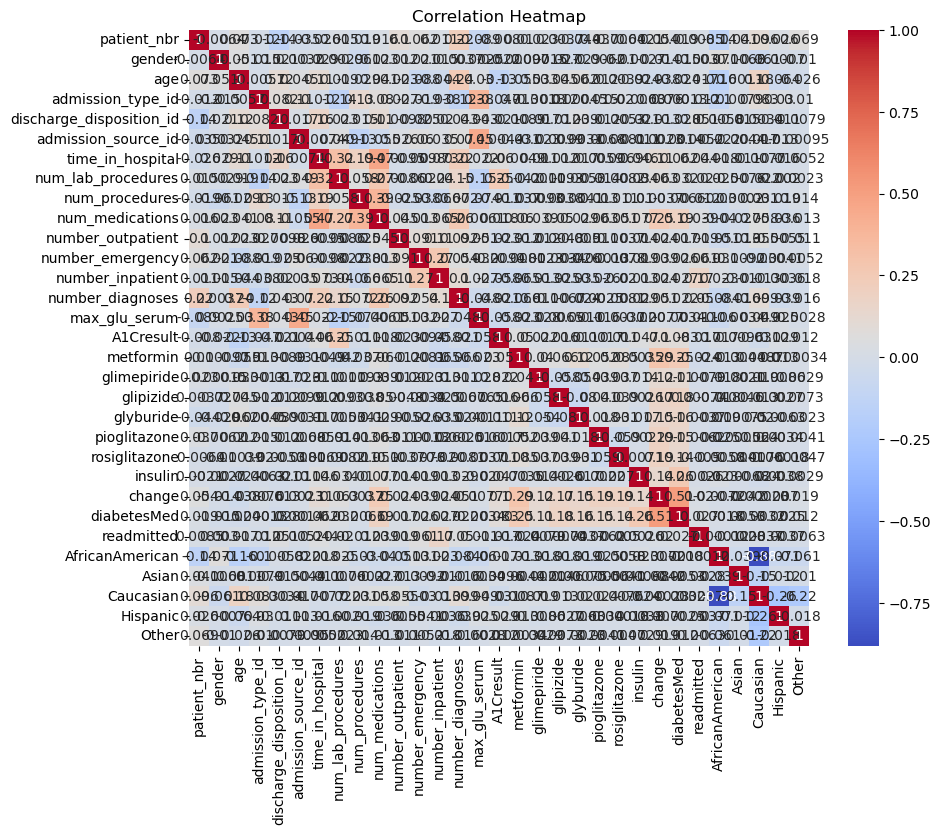

In [39]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
df1.corr()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,rosiglitazone,insulin,change,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other
patient_nbr,1.000000,-0.006379,0.073049,-0.012404,-0.141320,-0.035142,-0.025935,0.014934,-0.019005,0.015870,...,-0.006430,0.002137,0.054383,0.018988,0.008496,-0.141952,0.040540,0.095833,0.026107,0.069197
gender,-0.006379,1.000000,0.050820,-0.015089,0.020911,0.003230,0.029441,0.002942,-0.060796,0.022702,...,-0.010117,-0.002684,-0.014445,-0.015419,0.002984,0.070683,-0.006846,-0.061272,-0.000695,-0.010395
age,0.073049,0.050820,1.000000,-0.005692,0.115222,0.044706,0.106582,0.019083,-0.028603,0.040609,...,0.003925,-0.023522,-0.037648,-0.024009,0.016714,-0.161616,0.001084,0.179244,-0.064441,-0.026068
admission_type_id,-0.012404,-0.015089,-0.005692,1.000000,0.081917,0.108702,-0.012411,-0.142439,0.128800,0.079817,...,0.019949,-0.006258,0.007629,0.000127,-0.011704,-0.104401,0.007926,0.082943,0.029522,0.009984
discharge_disposition_id,-0.141320,0.020911,0.115222,0.081917,1.000000,0.016729,0.162860,0.023008,0.015095,0.107658,...,-0.005267,-0.021370,-0.012996,-0.028368,0.050632,0.005775,-0.014502,0.003355,-0.011164,-0.007872
admission_source_id,-0.035142,0.003230,0.044706,0.108702,0.016729,1.000000,-0.007352,0.048765,-0.134222,-0.054908,...,-0.008082,-0.011071,0.002331,0.001432,0.005177,-0.021638,-0.004385,0.016809,0.013271,-0.000951
time_in_hospital,-0.025935,0.029441,0.106582,-0.012411,0.162860,-0.007352,1.000000,0.317671,0.193234,0.466381,...,0.006870,0.046121,0.107913,0.061810,0.044353,0.017923,-0.010867,-0.007668,-0.016385,-0.005182
num_lab_procedures,0.014934,0.002942,0.019083,-0.142439,0.023008,0.048765,0.317671,1.000000,0.058407,0.266993,...,-0.008175,0.034222,0.062720,0.032150,0.020488,0.025146,-0.007606,-0.021945,-0.002050,0.002293
num_procedures,-0.019005,-0.060796,-0.028603,0.128800,0.015095,-0.134222,0.193234,0.058407,1.000000,0.385538,...,0.011405,0.010426,0.003737,-0.006638,-0.011678,-0.030408,0.000198,0.030583,-0.018986,0.013968
num_medications,0.015870,0.022702,0.040609,0.079817,0.107658,-0.054908,0.466381,0.266993,0.385538,1.000000,...,0.051446,0.077257,0.245284,0.186421,0.039473,-0.039621,-0.027123,0.057558,-0.035542,-0.012836


### Employ a Logistic Classifier

Now, that we have confirmed all of our columns have been converted into numerical datatypes. We can proceed with preparing our dataset for logistic regression. In the cells above, we can see our dataset now consists of 99,493 total patients. Of these total patients, only 11,169 (12.6%) were readmitted to the hospital. This is important because it means our dataset has a severe class imbalance that needs to be accounted for. 

- Not readmitted = 88,324
- Readmitted = 11,169 
    - 12.6% readmitted patients
    
To account for this class imbalance, we will use a weighted logistic regression model with hyperparameters: L1 regularization parameter (l1) to prevent overfitting and adds a penalty term to the loss function of the logistic regression model. L1 regularization parameter encourages the model to select a subset of the most important features by driving some of the coefficients to zero. 

GridSearchCV is a method used that helps in tuning hyperparameters for a machine learning model. It is used to search for the best combination of hyperparameters from a predefined grid of parameter values.

I also used a 5-fold cross validation which refers to the evaluation strategy used to assess the performance of the logistic regression model. The cross-validation technique is used to estimate how well the model will generalize to unseen data. The dataset is divided into 5 equal-sized folds, the model is trained on 4 folds, and evaluated on the remaining fold. This process is repeated 5 times, each time using a different fold as the evaluation set. The performance scores from these iterations are then averaged to estimate of the model's performance. This approach helps reduce the impact of random variations in the dataset and provides a more reliable evaluation metric for the model.

Now, we will begin and start by identifying our independent (X) and dependent/target variables (y). 
X = features and y = 'readmitted' column. Next, we will be splitting our data into training and testing sets, scale the data using MinMaxScaler, employ logistic regression, and evaluate the accuracy, percision, recall, f1-score, and ROC AUC. 

In [34]:
# Independent variable (X = features)
# Target variable (y = target)

X = df1.drop('readmitted', axis=1)
y = df1['readmitted']

In [35]:
# Split dataset into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [74]:
# Let's determine the accuracy using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Lets scale using MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then train the model and evaluate it

model = LogisticRegression(penalty='l1',solver='liblinear',class_weight='balanced', max_iter=1000)
params = {'C':[0.1,1.0,10]}
clf = GridSearchCV(model, params, n_jobs=-1)
clf.fit(X_train_scaled,y_train)


best_lr = clf.best_estimator_
coefs = best_lr.coef_

# Make predictions on the test set
y_pred = best_lr.predict(X_test_scaled)


print(f"Accuracy score on training set: {best_lr.score(X_train_scaled,y_train)}")
print(f"Accuracy score on test set: {best_lr.score(X_test_scaled,y_test)}")

Accuracy score on training set: 0.666545216976154
Accuracy score on test set: 0.6645057540579928


In [75]:
# calculate cross_val_score
scores = cross_val_score(best_lr, X_test_scaled, y_test, cv=5, scoring='roc_auc')

print("Cross-validation ROC AUC scores:", scores)
print("Mean ROC AUC:", scores.mean())

Cross-validation ROC AUC scores: [0.61511146 0.62202681 0.61245465 0.62518555 0.64056978]
Mean ROC AUC: 0.6230696493822324


In [48]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     17724
           1       0.15      0.18      0.16      2175

    accuracy                           0.80     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.80      0.81     19899



In [42]:
# Now, lets print the coefficients. This is done by first defining our feature names

feature_names = X.columns.tolist()

# Print the coefficients
print("Model Coefficients:")
for feature, coef in zip(feature_names, coefs[0]):
    print(f"{feature}: {coef}")

Model Coefficients:
patient_nbr: 0.07495370741830355
gender: -0.01917660556494057
age: 0.3841468867499433
admission_type_id: -0.11697482226657126
discharge_disposition_id: 0.6986291072897217
admission_source_id: -0.1141626175276081
time_in_hospital: 0.27778629440227276
num_lab_procedures: 0.13676459401921856
num_procedures: -0.11483323489191176
num_medications: 0.2389815305673095
number_outpatient: 0.0
number_emergency: 1.1908852869398296
number_inpatient: 6.105795622221675
number_diagnoses: 0.6271246051435134
max_glu_serum: 0.14216749574319976
A1Cresult: -0.1375643596365503
metformin: -0.21791402199545662
glimepiride: -0.1354400179702076
glipizide: 0.2007547915051763
glyburide: 0.0
pioglitazone: 0.0
rosiglitazone: -0.027978891978437455
insulin: 0.19670970459696696
change: -0.04895425911928481
diabetesMed: 0.16967331022009777
AfricanAmerican: 0.015530120760671074
Asian: 0.0
Caucasian: 0.0
Hispanic: -0.04563537128382129
Other: -0.056183217888218444


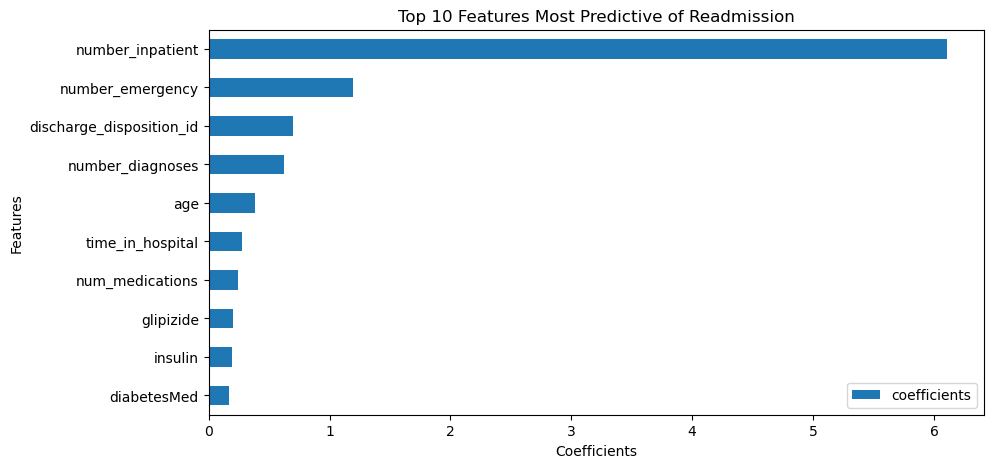

In [68]:
# Let's determine the top 10 features predictive of readmission and plot it

word_counts = pd.DataFrame(
    {"coefficients": coefs[0]},
    index=X_train.columns
).sort_values("coefficients", ascending=False)

ax = word_counts.head(10).plot(kind="barh", figsize=(10,5), legend=True)
ax.invert_yaxis()

plt.title ("Top 10 Features Most Predictive of Readmission")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.xticks
plt.show()

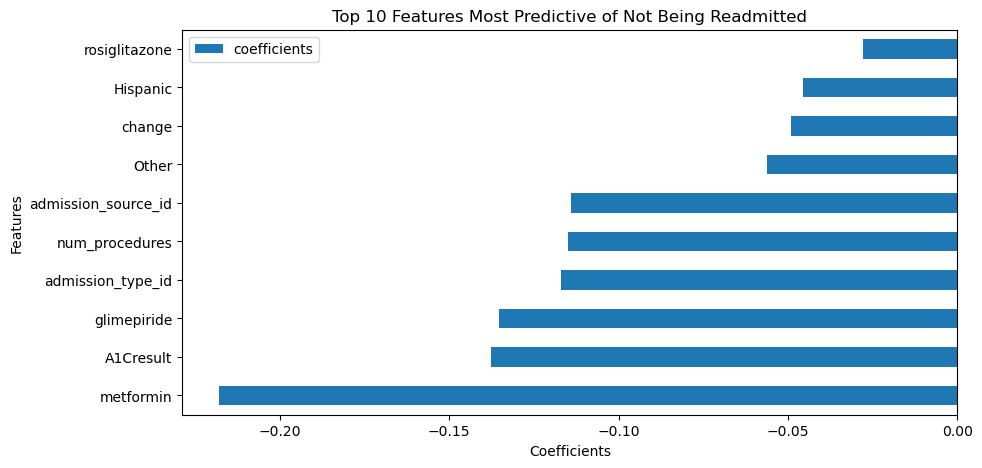

In [86]:
# Let's determine the top 10 features predictive of readmission and plot it

word_counts = pd.DataFrame(
    {"coefficients": coefs[0]},
    index=X_train.columns
).sort_values("coefficients", ascending=True)

word_counts.head(10).plot(kind="barh", figsize=(10,5), legend=True)

plt.title ("Top 10 Features Most Predictive of Not Being Readmitted")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.xticks
plt.show()

Based on the information we were provided above from the coeffients, we can start by droping five additional features (asian, caucasian, glyburide, pioglitazone, number_outpatient) all of which had a coeffiecent of zero. We will use logistic regression and evaluate the models performance. Then, we can gather insight on how our results may have changed and determine the top predictors in predicting hospital readmissions in diabetic patients.

In [69]:
# Independent variable (X = features)
# Target variable (y = target)

features_to_drop = ['Asian', 'Caucasian', 'glyburide', 'pioglitazone', 'number_outpatient']
X = df1.drop(['readmitted'] + features_to_drop, axis=1)
y = df1['readmitted']

In [70]:
# Split dataset into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [71]:
# Let's determine the accuracy using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Lets scale using MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then train the model and evaluate it

model = LogisticRegression(penalty='l1',solver='liblinear',class_weight='balanced', max_iter=1000)
params = {'C':[0.1,1.0,10]}
clf = GridSearchCV(model, params, n_jobs=-1)
clf.fit(X_train_scaled,y_train)


best_lr = clf.best_estimator_
coefs = best_lr.coef_

# Make predictions on the test set
y_pred = best_lr.predict(X_test_scaled)


print(f"Accuracy score on training set: {best_lr.score(X_train_scaled,y_train)}")
print(f"Accuracy score on test set: {best_lr.score(X_test_scaled,y_test)}")

Accuracy score on training set: 0.666545216976154
Accuracy score on test set: 0.6645057540579928


In [76]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.78     17724
           1       0.16      0.50      0.24      2175

    accuracy                           0.66     19899
   macro avg       0.54      0.59      0.51     19899
weighted avg       0.83      0.66      0.73     19899



In [73]:
# calculate cross_val_score
scores = cross_val_score(best_lr, X_test_scaled, y_test, cv=5, scoring='roc_auc')

print("Cross-validation ROC AUC scores:", scores)
print("Mean ROC AUC:", scores.mean())

Cross-validation ROC AUC scores: [0.61511275 0.62202746 0.61245465 0.62518684 0.64056978]
Mean ROC AUC: 0.6230702978591223


### Results

After cleaning our data, we determined the baseline accuracy of our model was 66.4%. This means that our model correctly predicts the target variable (readmitted) approximately 66.4% of the time. The precision, recall, and F1-score are metrics commonly used in binary classification to evaluate the performance of a model. Below, we will discuss the metrics of our baseline model and evaluate the changes in our model after removing the selected features.

Percision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. In our case, a precision score of 0.15 means that only 15% of the instances predicted as positive by the model were actually true positives, and the remaining 85% were false positives. Recall measures the porportion correctly predicted positive instances out of all actual positive instances (the true positives). A recall score of 0.18 indicates that the model was able to capture only 18% of the true positive instances, while missing 82% of them. Our score is very low and shows that our baseline model isn't able to correctly predict readmission. The F1-score is the mean of precision and recall. It provides a balance between the two metrics and is often used as a single summary measure of a model's performance. With an F1-score of 0.16, it indicates that our model's overall performance is low, considering both precision and recall. 

The mean ROC AUC (Area Under the Receiver Operating Characteristic Curve) which measures the performance of a binary classification model. It represents the average ROC AUC score obtained across multiple cross-validation folds or iterations. A mean ROC AUC of 0.62 suggests that, our model has some ability to distinguish between positive and negative samples. However, it is not highly accurate or discriminatory. 

After dropping the five additional columns, we can see the accuracy score did not change, the recall score increased significantly (32% increase), the f1- score increased by 8%, and the percision score increased slightly by 1% for predicting readmission. The mean ROC AUC value also stayed the same at 0.62, this shows the model is performing fairly decent (not that great) in distinguishing between different classes and demonstrating a moderate level of accuracy in its predictions (greater than random). However, we did not see an improvement in the score. 

After analyzing our results, we can see the feature "number_inpatient" was a top predictor in predicting hospital readmissions in diabetic patients. This makes sense because this means the number of days the patient was admitted to the hospital the year before maybe associated with the readmission of diabetic patients. When examining the predictors of not being readmitted, we can see there may be a relationship with the use of the diabetic medication metformin and or dose increase and patients not being readmitted. This also makes sense, because metformin is a medicine that helps regulate your blood sugar levels and is a first line medication used for diabetic patients.

### Conclusion

After completing this project, I was able to successfuly use a logistic regression model to 
identify key features that play a role in predicting hospital readmission in diabetic patients. The top feature for predicting hospital readmissions is the number of days the patient was hospitalized the year before encounter. The top feature for predicting if the patient will not be readmitted was if the patient was taking the diabetes medication metformin.

In the future, I would like to target a specific demographic of patients which are at least 65 years of age and have diabetes. Additionally, I plan to compare the performance of different machine learning models, inlcuding: decision trees, random forrest, and possibly others. I would also be interested in working with a dataset that contains an comprehensive list of all the prescriptions and non-prescription medications each patient is prescribed.